In [1]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras.preprocessing.image import ImageDataGenerator #for data organised in folders

In [2]:
path=r'./NEU Metal Surface Defects Data' #for desktop

In [3]:
# # accessing data from colab
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
# # folder path
# path=r'/content/drive/MyDrive/Colab Notebooks/Tlab/NEU Metal Surface Defects Data'

In [5]:
#exploring folder

In [6]:
os.listdir(path)

['test', 'Thumbs.db', 'train', 'valid']

In [7]:
os.listdir(path+'/train')

['Crazing', 'Inclusion', 'Patches', 'Pitted', 'Rolled', 'Scratches']

In [8]:
classes_defects=os.listdir(path+'/train')
print(classes_defects)
print(type(classes_defects))

['Crazing', 'Inclusion', 'Patches', 'Pitted', 'Rolled', 'Scratches']
<class 'list'>


In [9]:
os.listdir(path+'/train/Patches')[:10]

['.ipynb_checkpoints',
 'Pa_120.bmp',
 'Pa_121.bmp',
 'Pa_122.bmp',
 'Pa_123.bmp',
 'Pa_124.bmp',
 'Pa_125.bmp',
 'Pa_126.bmp',
 'Pa_127.bmp',
 'Pa_128.bmp']

In [10]:
from PIL import Image

In [11]:
img1=Image.open(path+'/train/Patches/Pa_206.bmp')
print(img1.filename)
print(img1.format)
print(img1.mode)
print(img1.size)

# # The "L" mode represents grayscale here.... So it can hold any of 256 shades of Gray 
# (includes black and white as Gray shades).
# # The "P" mode can hold 256 different colors like red,blue, green etc....
# https://stackoverflow.com/questions/52307290/what-is-the-difference-between-images-in-p-and-l-mode-in-pil#:~:text=Examples%3A%208%20bit%20black%20and,are%20%22P%22%20mode..

./NEU Metal Surface Defects Data/train/Patches/Pa_206.bmp
BMP
L
(200, 200)


In [12]:
image=plt.imread(path+'/train/Patches/Pa_206.bmp')


(200, 200)
max_pixel_value: 255


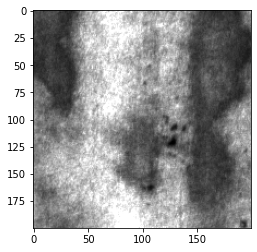

In [13]:
print(image.shape)
plt.imshow(image,cmap='gray')
print("max_pixel_value: {}".format(image.max()))

In [14]:
image_height=200
image_width=200
batch_size=16

In [15]:
#ImageDataGenerator and flow_from_directory for datasets

In [16]:
# # https://vijayabhaskar96.medium.com/tutorial-image-classification-with-keras-flow-from-directory-and-generators-95f75ebe5720

# https://github.com/aladdinpersson/Machine-Learning-Collection/blob/master/ML/TensorFlow/Basics/tutorial18-customdata-images/1_in_subfolders.py

In [17]:
data_generator=ImageDataGenerator(
    rescale=1.0/255,
    dtype=tf.float32
)

In [18]:
train_ds=data_generator.flow_from_directory(
    path+'/train',
    target_size=(200,200),
    # color_mode='grayscale',
    classes=classes_defects,
    class_mode='sparse',
    shuffle=True,
    seed=1,
    batch_size=batch_size
)

Found 1667 images belonging to 6 classes.


In [19]:
valid_ds=data_generator.flow_from_directory(
    path+'/valid',
    target_size=(200,200),
    # color_mode='grayscale',
    classes=classes_defects,
    class_mode='sparse',
    shuffle=True,
    seed=1,
    batch_size=batch_size
)

Found 72 images belonging to 6 classes.


In [20]:
test_ds=data_generator.flow_from_directory(
    path+'/test',
    target_size=(200,200),
    # color_mode='grayscale',
    classes=classes_defects,
    class_mode='sparse',
    shuffle=False,
    seed=1,
    batch_size=batch_size
)

Found 72 images belonging to 6 classes.


In [21]:
# exploring datsets

In [22]:
import numpy as np

In [23]:
print(len(train_ds[0]))

2


In [24]:
print(len(train_ds[0][0]))

16


In [25]:
print(train_ds[0][0].shape)

(16, 200, 200, 3)


(16, 200, 200, 3)
3.0
['Crazing', 'Inclusion', 'Patches', 'Pitted', 'Rolled', 'Scratches']
tf.Tensor([3 0 5 3 0 3 0 5 4 2 0 3 4 3 0 1], shape=(16,), dtype=uint8)
Pitted


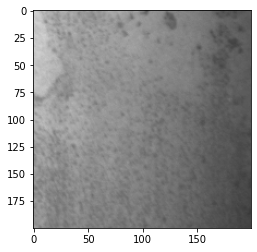

In [26]:
for images,labels in train_ds:
  plt.imshow(images[0],cmap='gray')
  print(images.shape)
  print(labels[0])
  labels=tf.cast(labels,tf.uint8)
  print(classes_defects)
  print((labels))
  print(classes_defects[labels[0]])
  break

In [27]:
#Pretrained models keras

In [28]:
# https://keras.io/api/applications/

In [29]:
# https://towardsdatascience.com/transfer-learning-for-image-classification-using-tensorflow-71c359b56673

In [30]:
from tensorflow.keras.applications import ResNet50

In [31]:
feature_extractor=ResNet50(weights='imagenet',input_shape=(200,200,3),include_top=False)
feature_extractor.trainable=False

In [32]:
input_=tf.keras.Input(shape=(200,200,3))
x=feature_extractor(input_,training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x=layers.Dense(128,activation='relu')(x)
x=layers.Dense(64,activation='relu')(x)
x=layers.Dense(32,activation='relu')(x)
output_=layers.Dense(6)(x)

In [33]:
model=keras.Model(input_,output_)

In [34]:
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                             

In [35]:
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=keras.optimizers.Adam(0.001),
              metrics=['accuracy'])

In [36]:
history=model.fit(train_ds, epochs=100, verbose=True,validation_data=valid_ds)

Epoch 1/100
105/105 [==============================] - 15s 97ms/step - loss: 1.8006 - accuracy: 0.1752 - val_loss: 1.7953 - val_accuracy: 0.1667
Epoch 2/100
105/105 [==============================] - 8s 79ms/step - loss: 1.7977 - accuracy: 0.1608 - val_loss: 1.7890 - val_accuracy: 0.1667
Epoch 3/100
105/105 [==============================] - 8s 80ms/step - loss: 1.7747 - accuracy: 0.1956 - val_loss: 1.7631 - val_accuracy: 0.2500
Epoch 4/100
105/105 [==============================] - 8s 80ms/step - loss: 1.7260 - accuracy: 0.2436 - val_loss: 1.7092 - val_accuracy: 0.2500
Epoch 5/100
105/105 [==============================] - 8s 80ms/step - loss: 1.5730 - accuracy: 0.3077 - val_loss: 1.6682 - val_accuracy: 0.2639
Epoch 6/100
105/105 [==============================] - 8s 80ms/step - loss: 1.4300 - accuracy: 0.3701 - val_loss: 1.6187 - val_accuracy: 0.3194
Epoch 7/100
105/105 [==============================] - 8s 80ms/step - loss: 1.3546 - accuracy: 0.4007 - val_loss: 1.5823 - val_accuracy

In [37]:
model.evaluate(test_ds)

5/5 [==============================] - 0s 68ms/step - loss: 0.8711 - accuracy: 0.6250


[0.8711294531822205, 0.625]

In [97]:
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

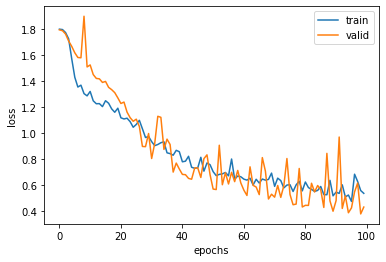

In [43]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','valid'])

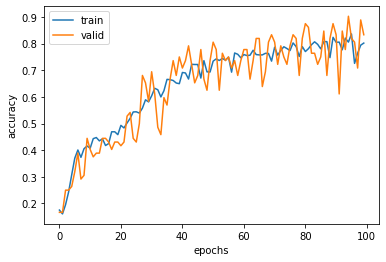

In [44]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.yscale()
plt.legend(['train','valid'])

In [93]:
#data_augmentation_vgg16 = layers.experimental.preprocessing.Resizing(height=224, width=224)

NameError: name 'vgg16' is not defined

In [ ]:
model.evaluate(test_ds)